In [12]:
# Vamos a realiazar la importacion de Datos
import pandas as pd   # Para el Manejo de Datos, es Obligatoria
import matplotlib.pyplot as plt   #Para hacer Graficas
import seaborn as sns  # Muestra Graficas Mas sofisticadas que Matplotlib


In [39]:
# asi vamos a llamar la informacion de la base de datos que tenemos en un archivo .csv usando Pandas.
datos_banco = pd.read_csv("dataset_banco_clean.csv")  # Este Archivo debe estar en la Carpeta del Desarrollo
datos_banco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [40]:
# Vamos a Iniciar el proceso del Analisis Exploratorio
# primero revisemos cual es el tipo de variable a analizar
datos_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_19744\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_19744\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_19744\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_19744\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixe

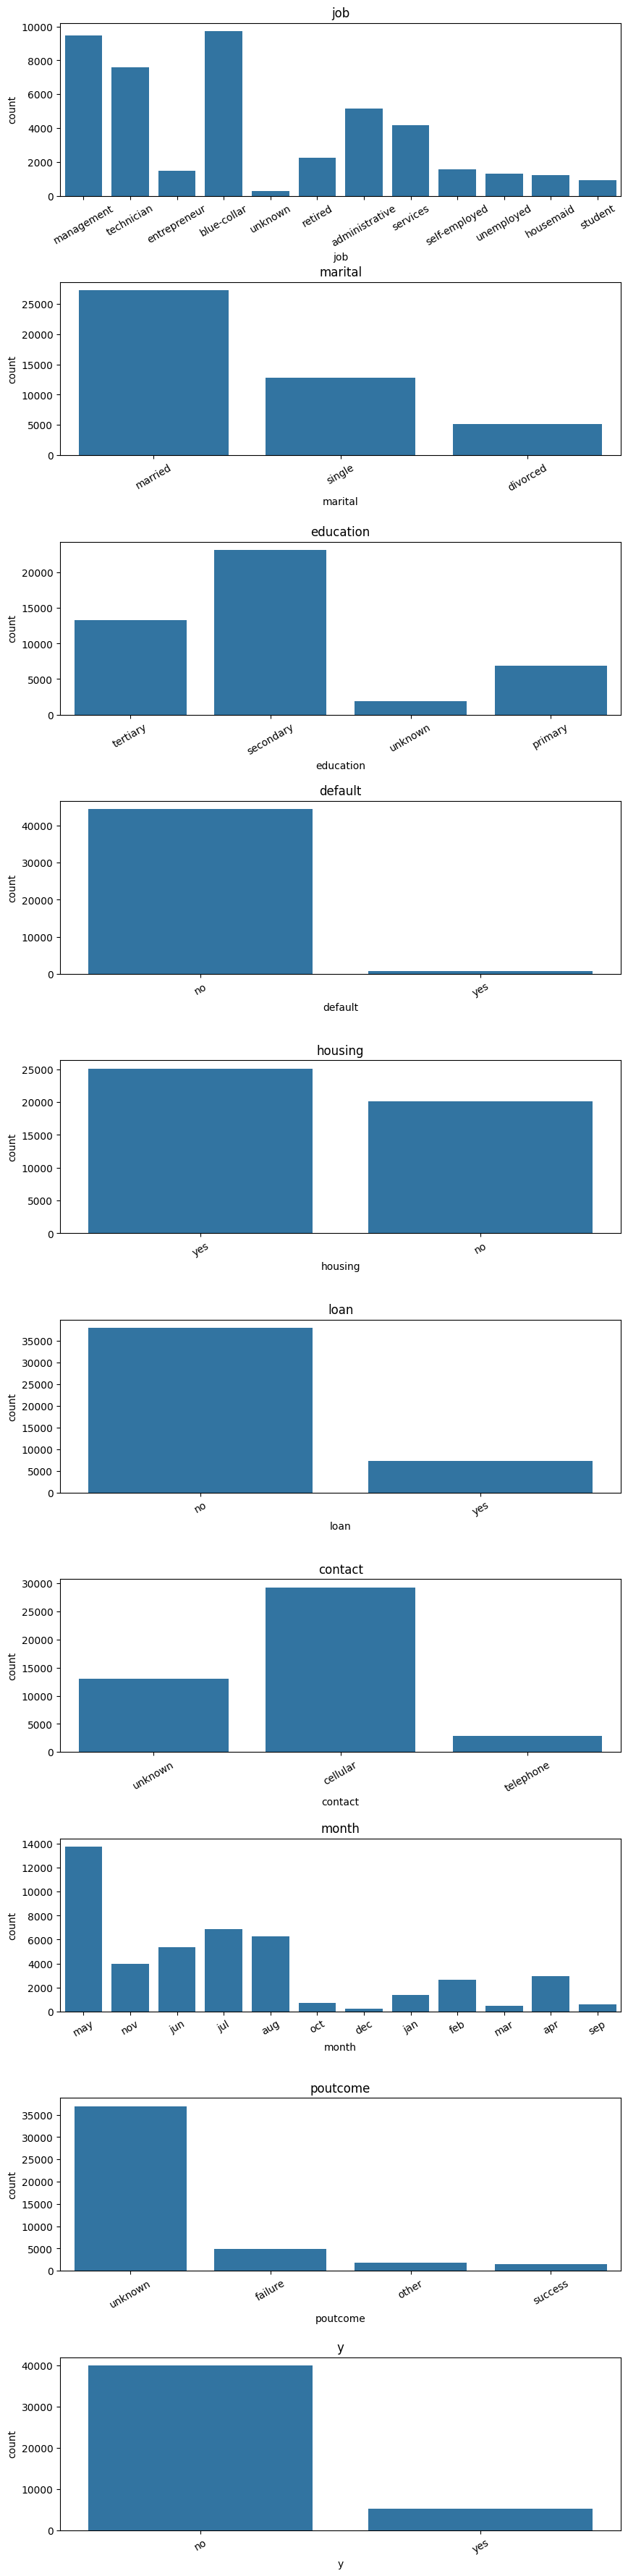

In [41]:
# Definamos cuales son la Variables Categoricas, que son todas Aquellas variables consideradas de TIPO Object
col_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
# ahora vamos a hacer los graficos de barras 
fig, ax = plt.subplots(nrows=len(col_cat), figsize = (10,45), ncols=1)  # Esta es la grilla para los Graficos
fig.subplots_adjust(hspace=0.5)

# Lo siguiente es para iterar sobre cada una de las columnas categoricas.
for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=datos_banco, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


# Aqui se puede dar un detalles de lo que se puede ver en este tipo de grafica.


In [42]:
datos_banco.drop(columns=["contact", "month", "day", "duration", "campaign", "pdays", "previous"], inplace=True)
datos_banco.columns
# Se nos muestra las columnas de los datos que quedaron en el DATAFRAME


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

In [43]:
# vamos ahora a revisar las VAriables que quedaron 
datos_banco.describe()
# ESTE FORMATO SOLO ANALIZA LAS vARIABLES NUMERICAS

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


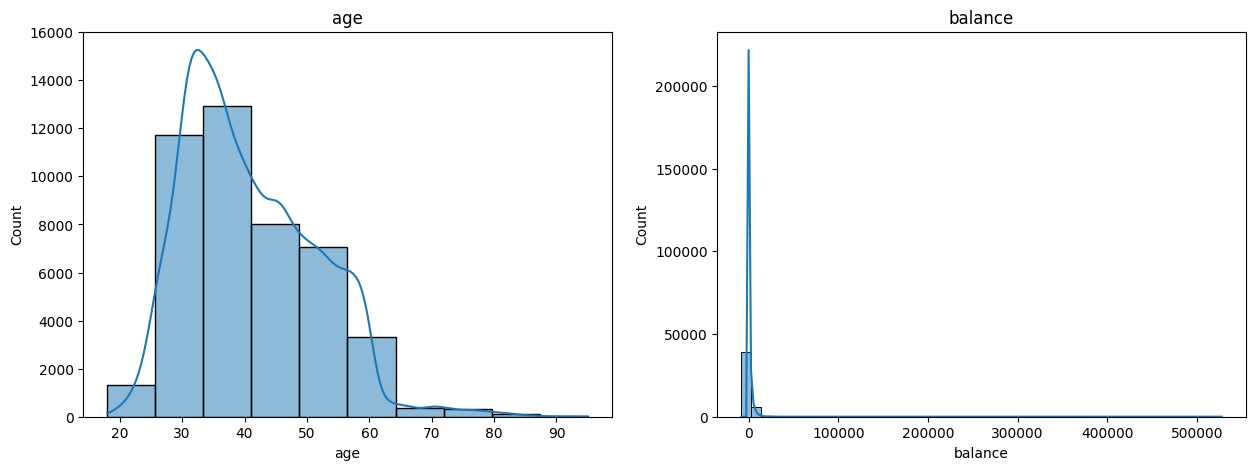

In [44]:
# LAS GRAFICAS POR EXCELENCIA SON LOS HISTOGRAMAS
# Vamos a Dibujar histogramas de esas variables Numericas, que en este caso solo tenemos dos.
col_num =["age", "balance"]
fig,ax =plt.subplots(nrows=1, ncols=2, figsize =(15,5))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(col_num):
    if col == "age":
        nbins = 10
    else:
        nbins=50
    sns.histplot(x=col, data=datos_banco, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)
# El resultado de las Graficas muestra que la mayor parte de las personas estaban 
# En el rango de edad de 30 y 45 Años *** Forma parte del analisi que se puede realizar.

In [45]:
# Vamos a ver a detalle lo que esta ocurriendo con Balance
datos_banco["balance"].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

In [46]:
# Entonces yes=1  y no=0
# creamos un Diccionario
diccio = {"yes":1 , "no":0}
binario = datos_banco["y"].map(diccio)
datos_banco["y_bin"] = binario  #Se crea una columna llamada y_bin al final que da el valor Binario 1 o 0
datos_banco

,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_bin
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,unknown,yes,1
45185,71,retired,divorced,primary,no,1729.0,no,no,unknown,yes,1
45186,72,retired,married,secondary,no,5715.0,no,no,success,yes,1
45187,57,blue-collar,married,secondary,no,668.0,no,no,unknown,no,0


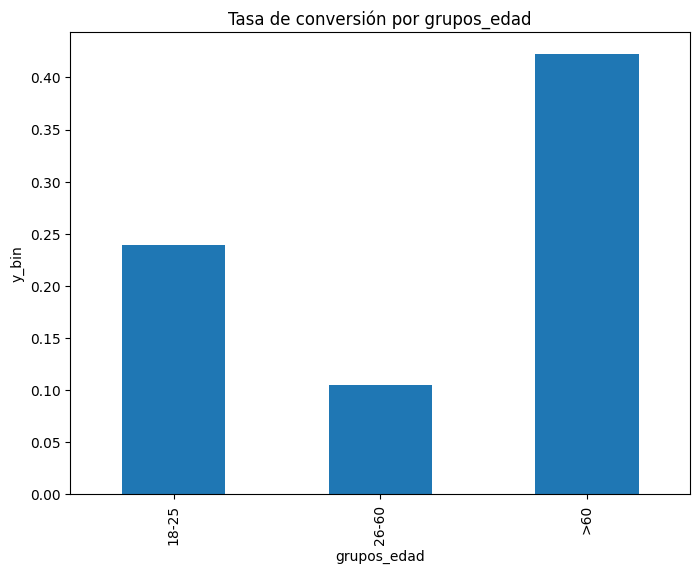

In [47]:
# Vamos a crear grupos de Edades y verificamos la tasa de conversion por cada Grupo de Edad.
# Nueva Columna en el DATASET: "Grupos Edad"
#Los valores finales encerrados en comillas indican la Etiqueta de la nueva Columna
datos_banco.loc[: ,"grupos_edad"] = "18-25"
datos_banco.loc[datos_banco["age"]>60, "grupos_edad"] = ">60"
datos_banco.loc[(datos_banco["age"]>25)&(datos_banco["age"]<=60), "grupos_edad"]="26-60"
def graf_tasa_conver(x, y, type="bar"):
    # Código para crear el gráfico de tasa de conversión
    plt.figure(figsize=(8, 6))
    if type == "bar":
        datos_banco.groupby(x)[y].mean().plot(kind='bar')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Tasa de conversión por {x}')
    # Agregar más opciones para otros tipos de gráficos si es necesario

    plt.show()

graf_tasa_conver("grupos_edad", "y_bin", type="bar")
# Mucho OJO con este codigo***** Fue mejorado por IA


In [48]:
# Ahora eliminamos la columna de Edad: "age"

datos_banco.drop(columns =["age"], inplace =True)
datos_banco


,job,marital,education,default,balance,housing,loan,poutcome,y,y_bin,grupos_edad
0,management,married,tertiary,no,2143.0,yes,no,unknown,no,0,26-60
1,technician,single,secondary,no,29.0,yes,no,unknown,no,0,26-60
2,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0,26-60
3,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0,26-60
4,unknown,single,unknown,no,1.0,no,no,unknown,no,0,26-60
...,...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,825.0,no,no,unknown,yes,1,26-60
45185,retired,divorced,primary,no,1729.0,no,no,unknown,yes,1,>60
45186,retired,married,secondary,no,5715.0,no,no,success,yes,1,>60
45187,blue-collar,married,secondary,no,668.0,no,no,unknown,no,0,26-60


In [49]:
# Realicemos  el mismos analisis pero para la variable "balance"
def graf_tasa_conver(x, y, type="scatter"):
    # Código para crear el gráfico de tasa de conversión
    plt.figure(figsize=(8, 6))
    if type == "scatter":
        datos_banco.groupby(x)[y].mean().plot(kind='scatter')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Tasa de conversión por {x}')
    # Agregar más opciones para otros tipos de gráficos si es necesario

    plt.show()


graf_tasa_conver("balance", "y_bin" , type ="scatter")      

ValueError: plot kind scatter can only be used for data frames

<Figure size 800x600 with 0 Axes>

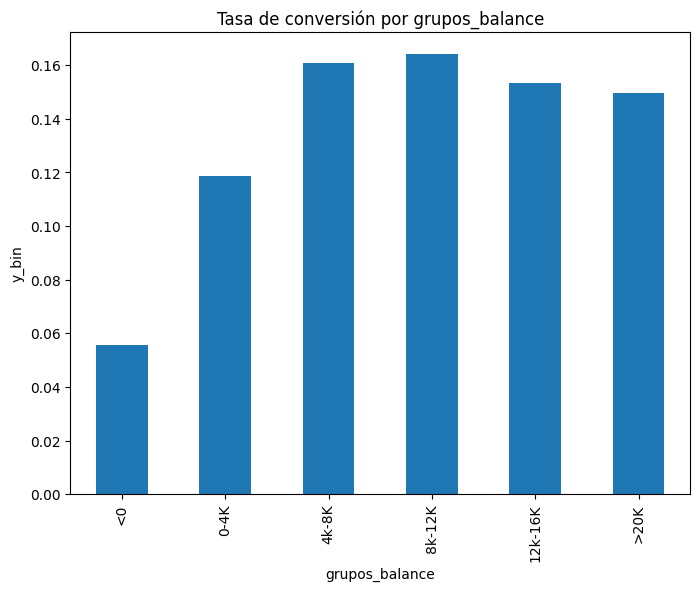

In [50]:
# Vamos a Hacer las graficas  de intervalos de edades
datos_banco.loc[:, "grupos_balance"] = "<0"
datos_banco.loc[(datos_banco["balance"]>=0) & (datos_banco["balance"]<4000), "grupos_balance"] = "0-4K"
datos_banco.loc[(datos_banco["balance"]>=4000) & (datos_banco["balance"]<8000), "grupos_balance"] = "4k-8K"
datos_banco.loc[(datos_banco["balance"]>=8000) & (datos_banco["balance"]<12000), "grupos_balance"] = "8k-12K"
datos_banco.loc[(datos_banco["balance"]>=12000) & (datos_banco["balance"]<16000), "grupos_balance"] = "12k-16K"
datos_banco.loc[(datos_banco["balance"]>=16000) & (datos_banco["balance"]<20000), "grupos_balance"] = "16k-20K"
datos_banco.loc[(datos_banco["balance"]>=20000), "grupos_balance"] = ">20K"
# Es necesario definir una nueva Funcion:
import matplotlib.pyplot as plt

def graf_tasa_conver(x, y, type="bar", order=None):
    # Código para crear el gráfico de tasa de conversión
    plt.figure(figsize=(8, 6))
    if type == "bar":
        if order:
            datos_banco.groupby(x)[y].mean().loc[order].plot(kind='bar')
        else:
            datos_banco.groupby(x)[y].mean().plot(kind='bar')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Tasa de conversión por {x}')
    # Agregar más opciones para otros tipos de gráficos si es necesario

    plt.show()


# Vamos a generar la tasa de Conversion pero en un orden
orden = ["<0", "0-4K", "4k-8K", "8k-12K" , "12k-16K", ">20K"]
graf_tasa_conver("grupos_balance", "y_bin" , type ="bar", order=orden)      
     # Ahora si podemos ver los resultados de esta Grafica
     


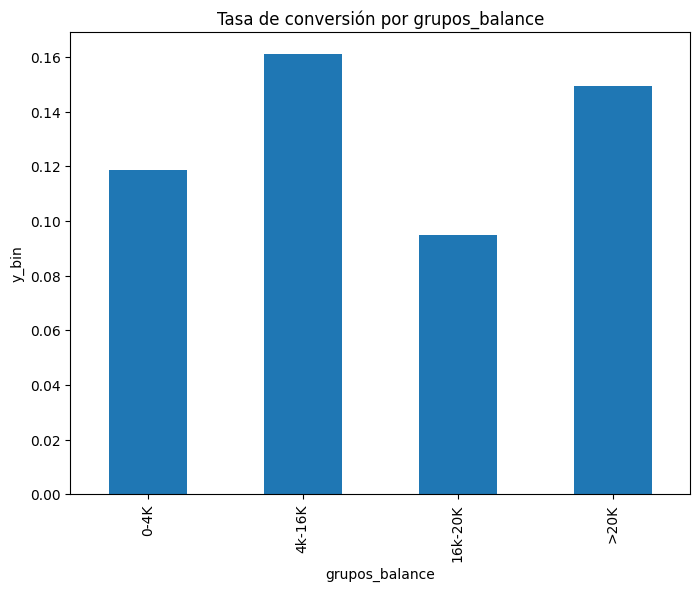

In [51]:
# vamos a reordenar en menos intervalos la grafica anterior.


datos_banco.loc[(datos_banco["balance"]>=0) & (datos_banco["balance"]<4000), "grupos_balance"] = "0-4K"
datos_banco.loc[(datos_banco["balance"]>=4000) & (datos_banco["balance"]<16000), "grupos_balance"] = "4k-16K"
datos_banco.loc[(datos_banco["balance"]>=16000) & (datos_banco["balance"]<20000), "grupos_balance"] = "16k-20K"
datos_banco.loc[(datos_banco["balance"]>=20000), "grupos_balance"] = ">20K"
# Es necesario definir una nueva Funcion:
import matplotlib.pyplot as plt

def graf_tasa_conver(x, y, type="bar", order=None):
    # Código para crear el gráfico de tasa de conversión
    plt.figure(figsize=(8, 6))
    if type == "bar":
        if order:
            datos_banco.groupby(x)[y].mean().loc[order].plot(kind='bar')
        else:
            datos_banco.groupby(x)[y].mean().plot(kind='bar')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Tasa de conversión por {x}')
    # Agregar más opciones para otros tipos de gráficos si es necesario

    plt.show()


# Vamos a generar la tasa de Conversion pero en un orden
orden = ["0-4K", "4k-16K", "16k-20K", ">20K"]
graf_tasa_conver("grupos_balance", "y_bin" , type ="bar", order=orden)      
     # Ahora si podemos ver los resultados de esta Grafica


In [52]:
# Vamos a reestructurar  los datos de las graficas anteriores.
# Vamos a eliminar la columna Balance por que ya tenemos los datos que mas nos interesan: 
datos_banco.drop(columns =["balance"], inplace =True)
datos_banco

,job,marital,education,default,housing,loan,poutcome,y,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,no,yes,no,unknown,no,0,26-60,0-4K
1,technician,single,secondary,no,yes,no,unknown,no,0,26-60,0-4K
2,entrepreneur,married,secondary,no,yes,yes,unknown,no,0,26-60,0-4K
3,blue-collar,married,unknown,no,yes,no,unknown,no,0,26-60,0-4K
4,unknown,single,unknown,no,no,no,unknown,no,0,26-60,0-4K
...,...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,no,no,unknown,yes,1,26-60,0-4K
45185,retired,divorced,primary,no,no,no,unknown,yes,1,>60,0-4K
45186,retired,married,secondary,no,no,no,success,yes,1,>60,4k-16K
45187,blue-collar,married,secondary,no,no,no,unknown,no,0,26-60,0-4K


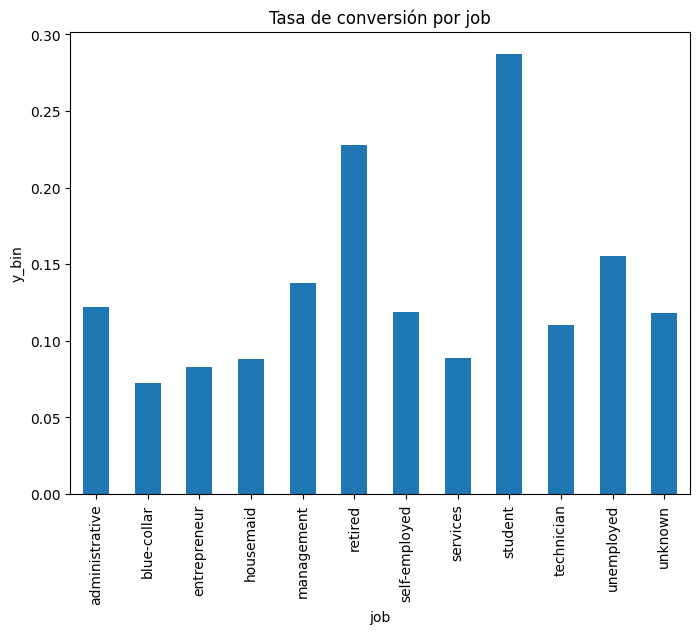

In [53]:
# El Siguiente es un analisis a las Variables Categoricas
graf_tasa_conver("job", "y_bin" , type ="bar")

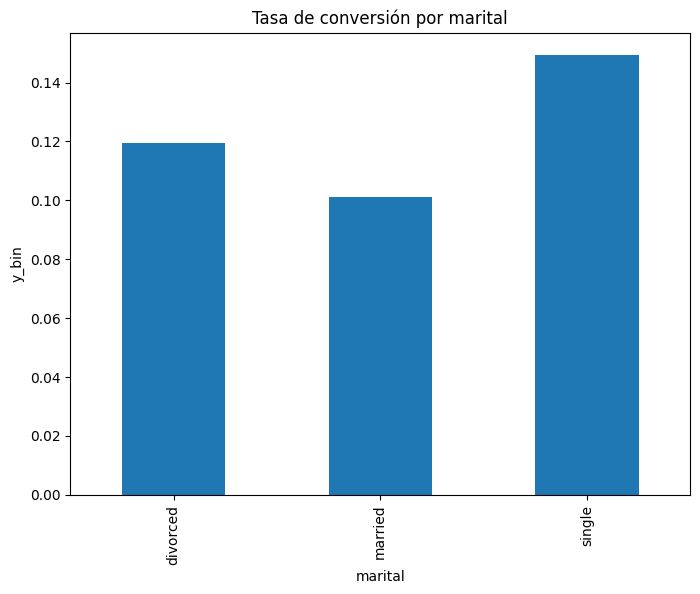

In [54]:
# El Siguiente es un analisis a las Variables Categoricas*** Ahora el Estado CIVIL***
graf_tasa_conver("marital", "y_bin" , type ="bar")

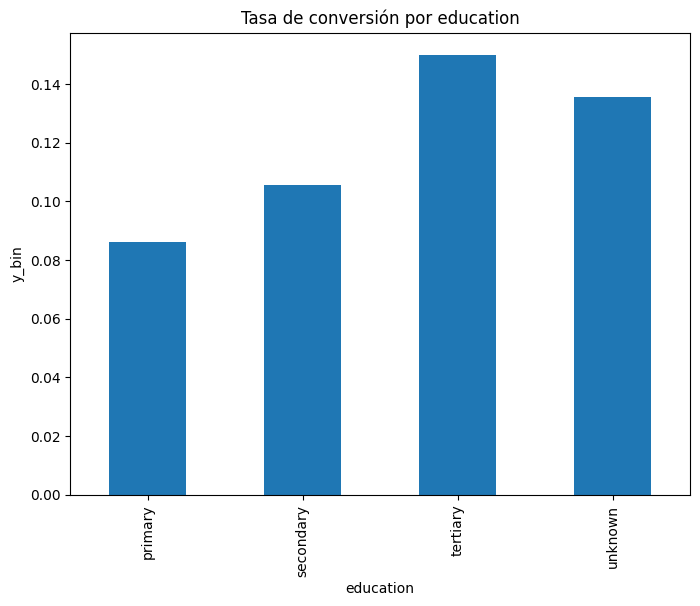

In [55]:
# El Siguiente es un analisis a las Variables Categoricas*** Ahora con Educacion***
graf_tasa_conver("education", "y_bin" , type ="bar")

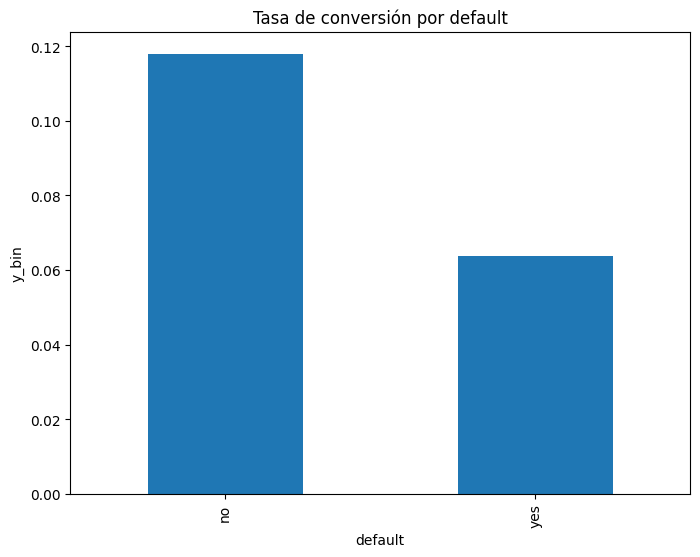

In [56]:
# El Siguiente es un analisis a las Variables Categoricas*** Ahora el default***
graf_tasa_conver("default", "y_bin" , type ="bar")

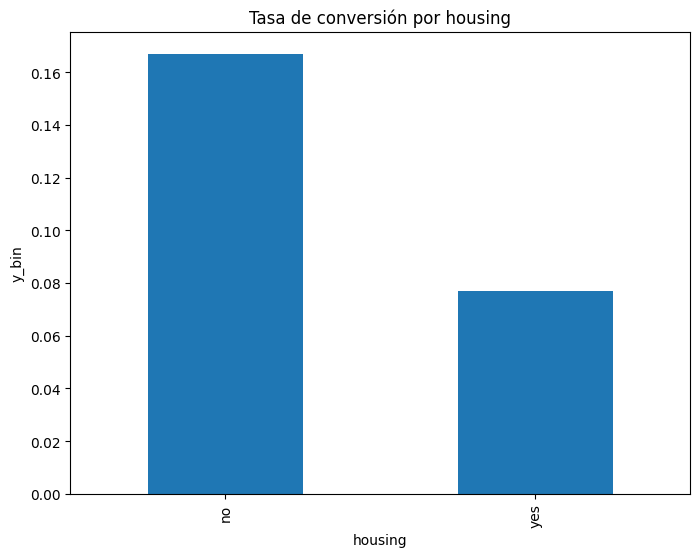

In [57]:
# El Siguiente es un analisis a las Variables Categoricas*** Ahora el Credito Hipotecario housing***
graf_tasa_conver("housing", "y_bin" , type ="bar")

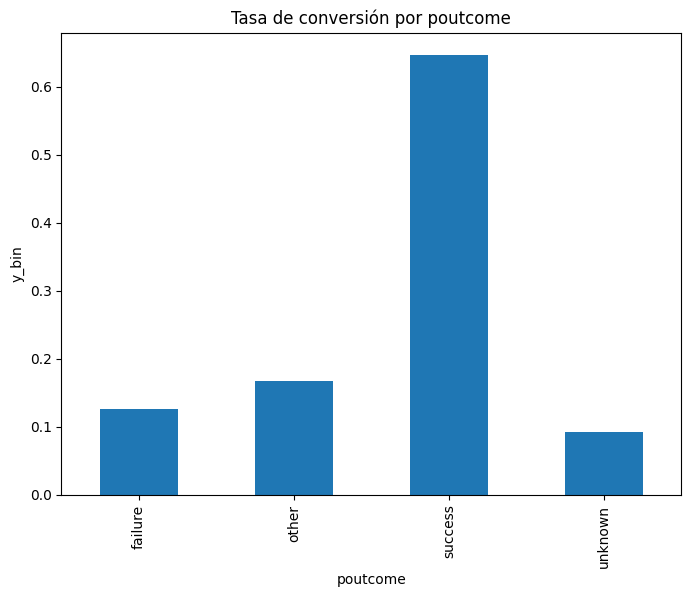

In [59]:
# El Siguiente es un analisis a las Variables Categoricas*** Ahora Si Adquirio Producto en Campaña anterior***
graf_tasa_conver("poutcome", "y_bin" , type ="bar")